# Titanic Dataset Description

## Overview

The Titanic dataset has been split into two groups:

- **Training Set:** This set, contained in `train.csv`, should be used to build your machine learning models. For each passenger in the training set, the outcome (also known as the “ground truth”) is provided. Your model will be based on features such as passengers’ gender and class. You can also utilize feature engineering to create new features.

- **Test Set:** The test set is contained in `test.csv` and should be used to evaluate how well your model performs on unseen data. For each passenger in the test set, the ground truth is not provided. It is your job to predict these outcomes. Use the model trained on the training set to predict whether or not each passenger survived the sinking of the Titanic.

We also provide `gender_submission.csv`, which contains a set of predictions that assume all and only female passengers survive. This file serves as an example of what a submission file should look like.

## File Descriptions

- `train.csv`: Training set containing features and outcomes for passengers.
- `test.csv`: Test set containing features for passengers without outcomes.
- `gender_submission.csv`: Example submission file with predictions assuming all and only female passengers survive.

## Instructions

1. Load the training and test datasets into your machine learning environment.
2. Explore and preprocess the data as needed.
3. Build your machine learning model using the training set.
4. Evaluate the performance of your model using appropriate metrics.
5. Generate predictions for the passengers in the test set.
6. Submit your predictions in the format specified (similar to `gender_submission.csv`).

## References

For more information on the Titanic dataset and its context, refer to [Kaggle's Titanic: Machine Learning from Disaster competition](https://www.kaggle.com/competitions/titanic/data).

# Variable Notes

Here are some additional notes on the variables in the Titanic dataset:

- **pclass:** This variable is a proxy for socio-economic status (SES), where:
  - 1st class indicates Upper SES
  - 2nd class indicates Middle SES
  - 3rd class indicates Lower SES

- **age:** Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5.

- **sibsp:** This variable defines family relations as follows:
  - Sibling: brother, sister, stepbrother, stepsister
  - Spouse: husband, wife (mistresses and fiancés were ignored)

- **parch:** This variable defines family relations as follows:
  - Parent: mother, father
  - Child: daughter, son, stepdaughter, stepson
  - Note: Some children traveled only with a nanny, therefore parch=0 for them.

# Variable Definitions and Keys

Here are the definitions and keys for each variable in the Titanic dataset:

- **survival:** Survival of the passenger.
  - 0 = No
  - 1 = Yes

- **pclass:** Ticket class indicating socio-economic status.
  - 1 = 1st class
  - 2 = 2nd class
  - 3 = 3rd class

- **sex:** Gender of the passenger.

- **age:** Age of the passenger in years.

- **sibsp:** Number of siblings / spouses aboard the Titanic.

- **parch:** Number of parents / children aboard the Titanic.

- **ticket:** Ticket number.

- **fare:** Passenger fare.

- **cabin:** Cabin number.

- **embarked:** Port of Embarkation.
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton

#### 1. loading Modules 

In [166]:
# EDA
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

# Date preprocessing 

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score, recall_score, f1_score, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Ml algorithms 

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import  SVC, SVR

#### 2. loading data

In [63]:
df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 3. EDA

In [66]:
from scipy.stats import chi2_contingency

def chi2_test_and_plot(data, x, y, alpha=0.05):
    """
    Perform chi-squared test of independence between two categorical variables
    and plot the countplot.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        x (str): The name of the first categorical variable.
        y (str): The name of the second categorical variable.
        alpha (float): The significance level for the test (default is 0.05).

    Returns:
        None
    """
    def plot_survival_count(data, x, hue):
        """
        Plot survival count by a categorical variable.

        Parameters:
            data (DataFrame): The DataFrame containing the data.
            x (str): The name of the variable to be plotted.
            hue (str): The name of the variable to be used for coloring.

        Returns:
            None
        """
        # Set the style of seaborn
        sns.set_style("whitegrid")

        # Plot
        plt.figure(figsize=(8, 6))
        sns.countplot(data=data, x=x, hue=hue, palette="Set2")

        # Title and labels
        plt.title("Survival Count by " + x.capitalize())
        plt.xlabel(x.capitalize())
        plt.ylabel("Count")

        # Move the legend outside the plot
        plt.legend(title=hue.capitalize(), loc="upper right", bbox_to_anchor=(1.25, 1))

        # Show plot
        plt.show()

    # Create a contingency table
    contingency_table = pd.crosstab(data[x], data[y])

    # Perform the chi-squared test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Determine if the result is statistically significant
    is_significant = p_val < alpha

    # Print test results
    print("Chi-squared test statistic:", chi2_stat)
    print("P-value:", p_val)
    print("Is statistically significant?", is_significant)

    plot_survival_count(data, x, y)

In [67]:
def plot_missing_values_heatmap(df):
    """
    Display a heatmap showing missing values in the DataFrame.

    Parameters:
    - df : pandas DataFrame
        Input dataset.
    This function plots a heatmap where missing values are represented as True (1) and non-missing values are represented as False (0).
    """
    missing_values_count = df.isnull().sum() # Count the number of missing values in each column
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
    plt.title('Missing Values Heatmap')
    plt.show()
    print("Number of missing values in each column:")
    print(missing_values_count)

In [68]:
# handing missing values
 
def handling_missing_values(data):
     """
     Parameters:
    - data : pandas DataFrame
        Input dataset containing missing values.

    This function identifies columns with missing values in the input DataFrame and handles them based on the percentage of missing values:
    - Columns with more than 60% missing values are dropped entirely.
    - Columns with less than 5% missing values have the corresponding rows with missing values dropped.

    Note:
    - The function modifies the input DataFrame 'data' in place.
    """
     columns = data.columns[data.isna().sum()> 0].to_list()

     for column in columns:
          if data[column].isna().sum() > len(data) * 0.6 :
               data.drop(columns=column, axis=1, inplace=True) # if data contains > 60% Na, then drop the column

          elif data[column].isna().sum() < len(data) * 0.05:
               data.dropna(subset=[column], inplace=True) # if data contains < 5% Na, then drop the the Na  

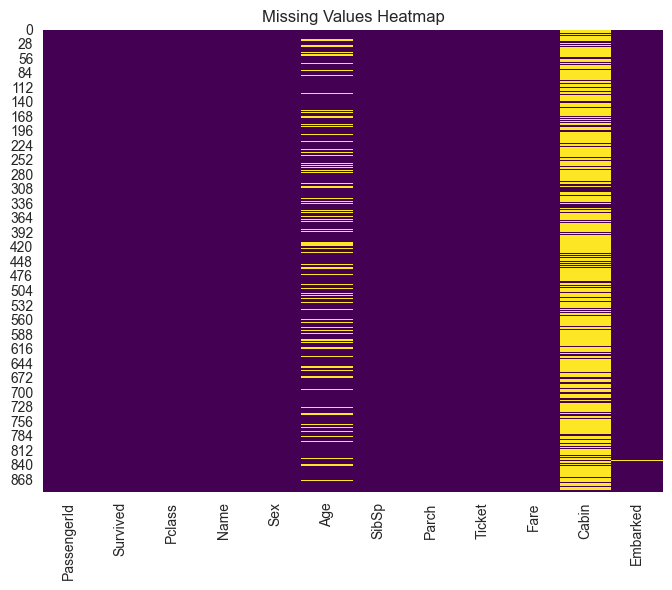

Number of missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [69]:
# Checking all missing values in the data frame
plot_missing_values_heatmap(df)

In [70]:
df_copy = df.copy()

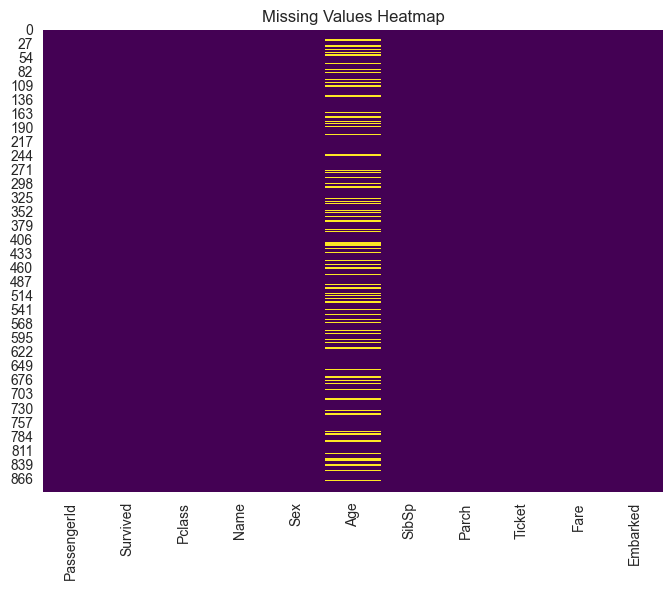

Number of missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


In [71]:
# the new data

handling_missing_values(df_copy)

# Plotting the heat map for the new data set
plot_missing_values_heatmap(df_copy)

In [72]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [73]:

X_age = df_copy[~df_copy['Age'].isna()].drop(columns=["Age", 'Name', "Ticket",'Embarked','PassengerId'], axis=1)

Y_age = df_copy['Age'][~df_copy['Age'].isna()].values

In [74]:
X_age

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,female,0,5,29.1250
886,0,2,male,0,0,13.0000
887,1,1,female,0,0,30.0000
889,1,1,male,0,0,30.0000


In [122]:
# handling missing values with machine learning algorithm

num_pipline = Pipeline([
    ("scaling",StandardScaler()),
])
cat_pipline = Pipeline([
    ("hot_encoding", OneHotEncoder())
])
label_pipline = Pipeline([
    ("LabelEncoder", OrdinalEncoder())
]) 

In [76]:
string_columns = X_age.select_dtypes(include=['object']).columns.to_list()
numerical_columns =X_age.select_dtypes(include=['int64','float64']).columns.to_list()
print(string_columns)

['Sex']


In [77]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipline, string_columns),  # Apply numeric transformation to 'numeric_col'
        ('num', num_pipline, numerical_columns)  # Apply categorical transformation to 'categorical_col'
    ])

transformed_data = preprocessor.fit_transform(X_age)

In [78]:
def evaluate_models(models, X, y, cv=5, scoring=('neg_mean_squared_error', 'r2')):
    """
    Evaluate multiple regression models using cross-validation.

    Parameters:
    - models : dict
        Dictionary of regression models to evaluate, where keys are model names and values are model instances.
    - X : array-like
        Feature matrix.
    - y : array-like
        Target variable.
    - cv : int, default=5
        Number of cross-validation folds.
    - scoring : tuple, default=('neg_mean_squared_error', 'r2')
        Scoring metrics to use for evaluation.

    Returns:
    - results : dict
        Dictionary containing mean and standard deviation of scores for each model.
    """
    results = {}

    for model_name, model in models.items():
        model_results = {}
        for metric in scoring:
            if metric == 'neg_mean_squared_error':
                cv_scores = cross_val_score(model, X, y, cv=cv, scoring=metric)
                mse_scores = -cv_scores
                mean_mse = mse_scores.mean()
                std_mse = mse_scores.std()
                model_results['mean_mse'] = mean_mse
                model_results['std_mse'] = std_mse
            elif metric == 'r2':
                cv_scores = cross_val_score(model, X, y, cv=cv, scoring=metric)
                mean_r2 = cv_scores.mean()
                std_r2 = cv_scores.std()
                model_results['mean_r2'] = mean_r2
                model_results['std_r2'] = std_r2
        results[model_name] = model_results

    return results

In [79]:
models_to_evaluate = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'DecisionTree' : DecisionTreeRegressor(random_state=42),
    "SVM":SVR(kernel='linear')
}
evaluate_models(models_to_evaluate,transformed_data, Y_age)


{'Linear Regression': {'mean_mse': 158.08248670243574,
  'std_mse': 8.702811013036598,
  'mean_r2': 0.2322031793405411,
  'std_r2': 0.06409532623462423},
 'Random Forest': {'mean_mse': 173.69721617357123,
  'std_mse': 22.243065917897447,
  'mean_r2': 0.1542352205042254,
  'std_r2': 0.13546203678038923},
 'DecisionTree': {'mean_mse': 240.57077216230928,
  'std_mse': 20.89675549826459,
  'mean_r2': -0.17261498567797198,
  'std_r2': 0.1604964205646875},
 'SVM': {'mean_mse': 163.5953139699991,
  'std_mse': 12.080160116556643,
  'mean_r2': 0.20587299809016865,
  'std_r2': 0.07026535607059967}}

In [80]:
X_test = df_copy[df_copy['Age'].isnull()]

X_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Embarked'], inplace=True)
X_test

C:\Users\mohammedsamir\AppData\Local\Temp\ipykernel_10028\3593709656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Embarked'], inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,male,NaN,0,0,8.4583
17,1,2,male,NaN,0,0,13.0000
19,1,3,female,NaN,0,0,7.2250
26,0,3,male,NaN,0,0,7.2250
28,1,3,female,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292
863,0,3,female,NaN,8,2,69.5500
868,0,3,male,NaN,0,0,9.5000
878,0,3,male,NaN,0,0,7.8958


In [81]:
transformed_data_2 = preprocessor.fit_transform(X_test)

In [82]:
estimator = LinearRegression()

estimator.fit(transformed_data, Y_age)

New_prediction = estimator.predict(transformed_data_2)


In [83]:
X_test['Age'] = New_prediction

C:\Users\mohammedsamir\AppData\Local\Temp\ipykernel_10028\923462374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age'] = New_prediction


In [84]:
full_df = df_copy.copy()

In [85]:
# Now impute the missing values with the predicted values

full_df['Age'] = full_df['Age'].fillna(X_test['Age'])


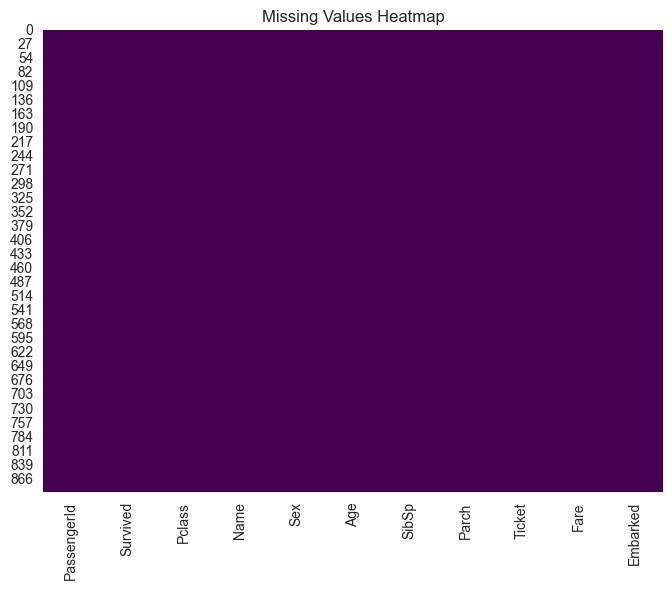

Number of missing values in each column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [86]:
plot_missing_values_heatmap(full_df)

#### Data visualization

Chi-squared test statistic: 258.4266104463763
P-value: 3.7799096665576e-58
Is statistically significant? True


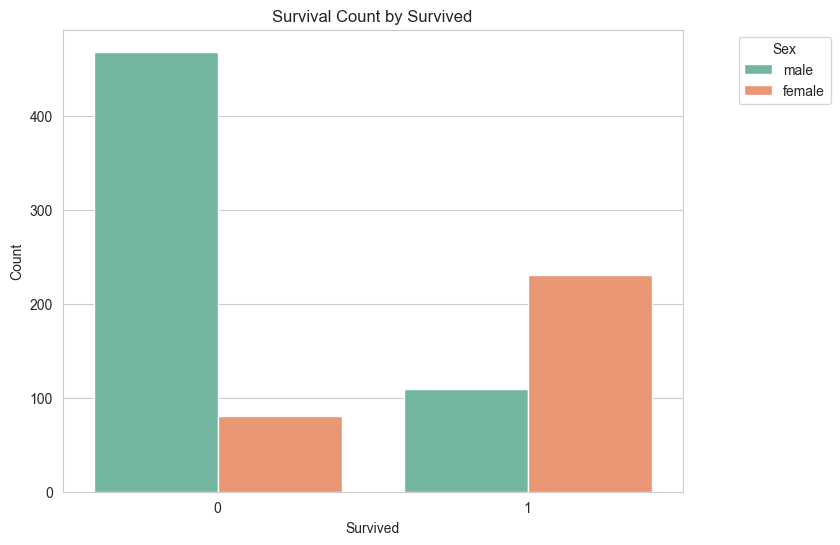

In [87]:
chi2_test_and_plot(full_df, "Survived", "Sex")

Chi-squared test statistic: 100.98040726128336
P-value: 1.1813624785477922e-22
Is statistically significant? True


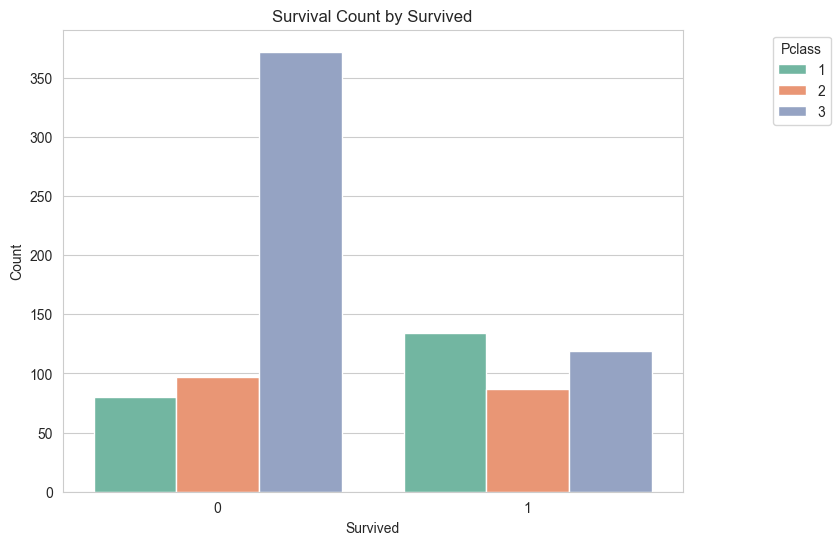

In [88]:
chi2_test_and_plot(full_df, "Survived", "Pclass")

Chi-squared test statistic: 37.741348475705145
P-value: 1.2620136275677032e-06
Is statistically significant? True


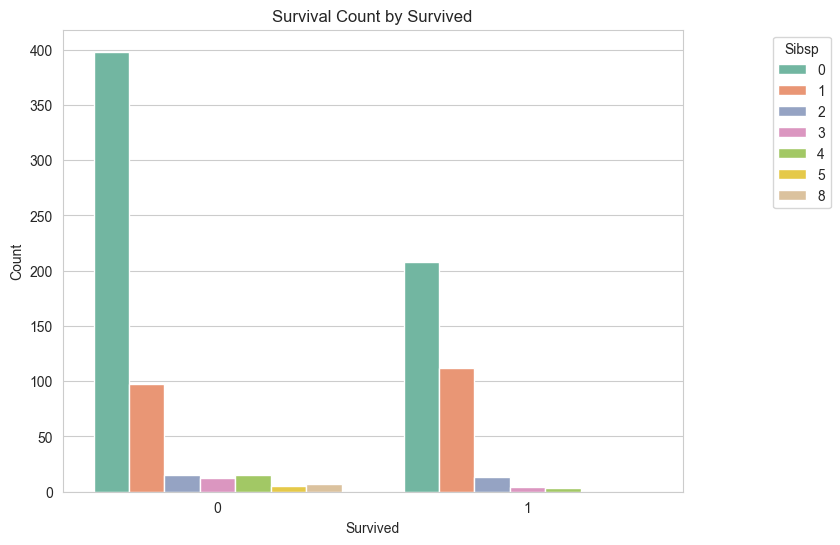

In [89]:
chi2_test_and_plot(full_df, "Survived", "SibSp")

Chi-squared test statistic: 28.40061868331157
P-value: 7.896496976051105e-05
Is statistically significant? True


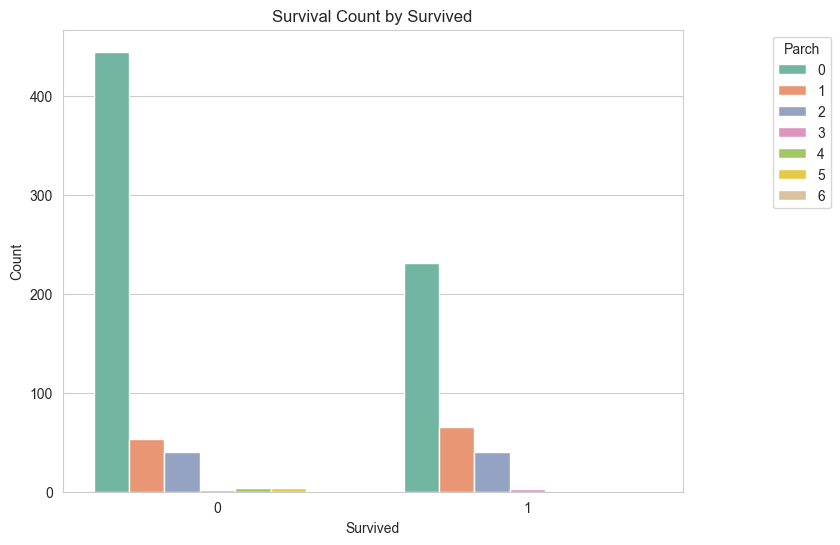

In [90]:
chi2_test_and_plot(full_df, "Survived", "Parch")

<Axes: xlabel='Fare', ylabel='Count'>

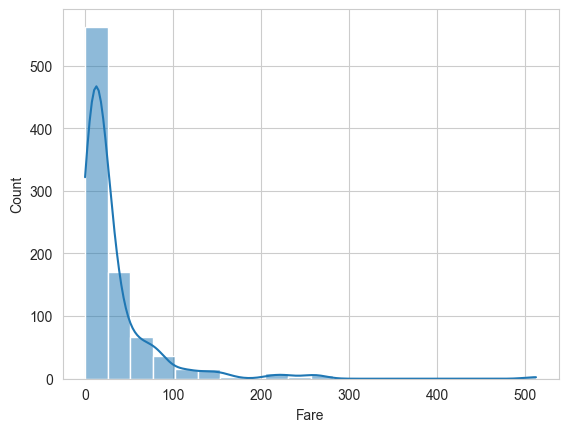

In [91]:
sns.histplot(data=full_df, x='Fare', bins=20, kde=True)

<Axes: xlabel='Age', ylabel='Count'>

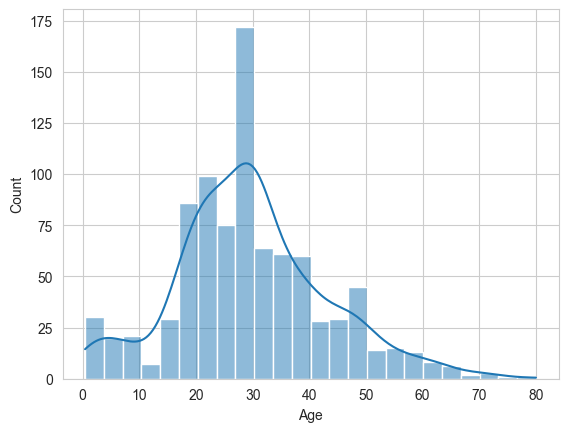

In [92]:
sns.histplot(data=full_df, x='Age', kde=True)

<Axes: ylabel='Fare'>

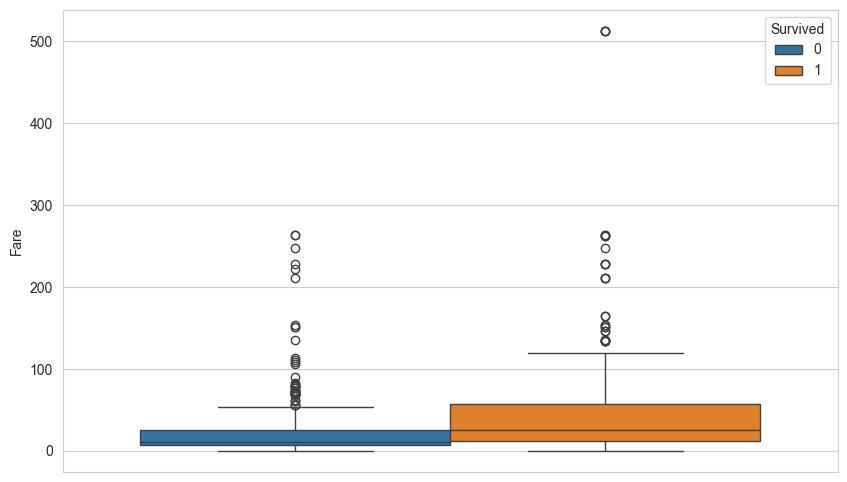

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_df, y='Fare', hue='Survived')

<Axes: xlabel='Pclass'>

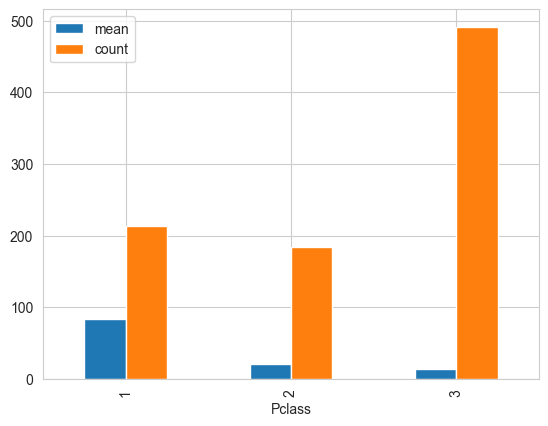

In [94]:
full_df.groupby('Pclass')['Fare'].agg(["mean", 'count']).plot(kind='bar')

<Axes: xlabel='Survived'>

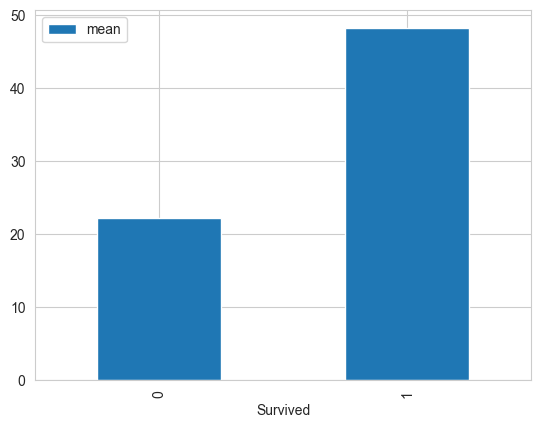

In [95]:
full_df.groupby('Survived')['Fare'].agg(["mean"]).plot(kind='bar')

Chi-squared test statistic: 26.48914983923762
P-value: 1.769922284120912e-06
Is statistically significant? True


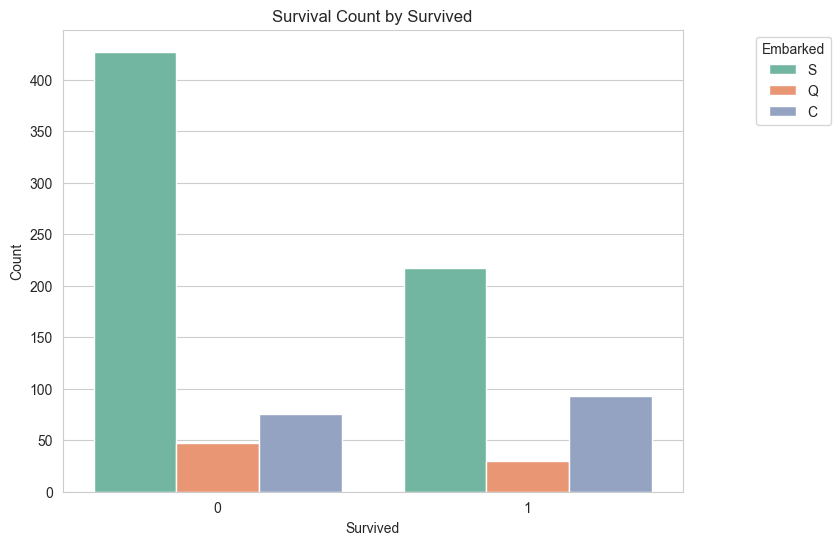

In [96]:
chi2_test_and_plot(full_df, "Survived", "Embarked")

In [97]:
categorical_columns = full_df.select_dtypes(include=['object']).columns

<Axes: >

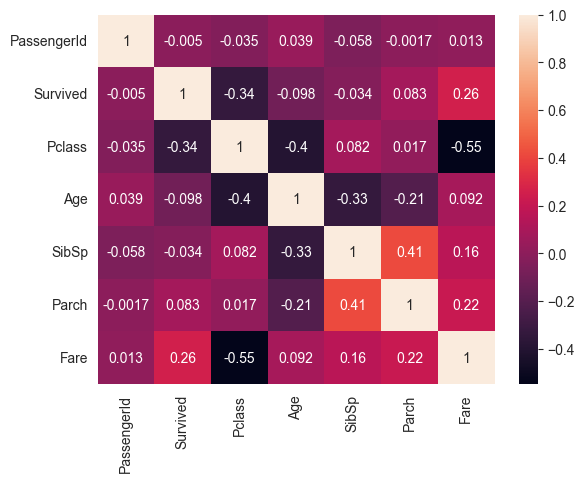

In [98]:
corr_matrix = full_df.drop(columns=categorical_columns).corr()
sns.heatmap(corr_matrix, annot=True)

#### Feature Engineering 



In [99]:
# Instead of using the continuous fare values directly, you can bin them into discrete categories. This can help capture non-linear relationships and reduce the impact of outliers.

full_df['Fare_Bin'] = pd.cut(full_df['Fare'], bins=[0, 25, 50, 100, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Name         889 non-null    object  
 4   Sex          889 non-null    object  
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Embarked     889 non-null    object  
 11  Fare_Bin     874 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 84.4+ KB


Chi-squared test statistic: 77.99440068412864
P-value: 8.263571627344928e-17
Is statistically significant? True


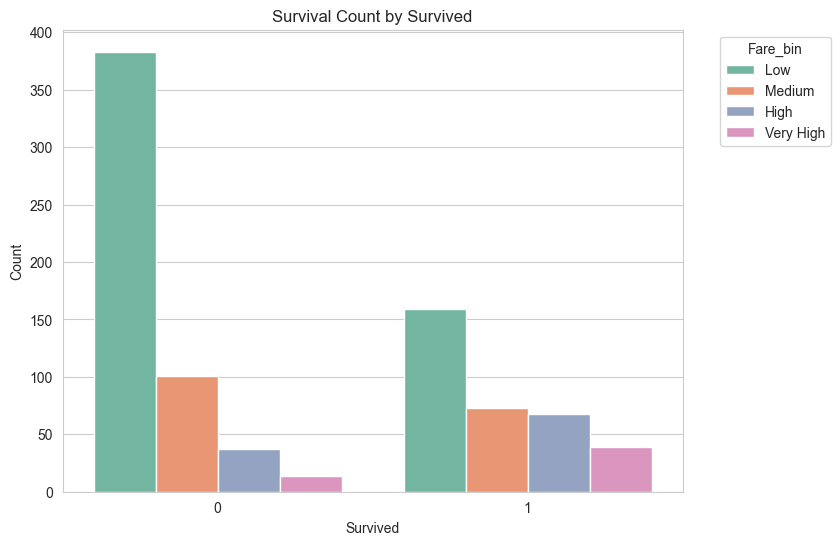

In [100]:
chi2_test_and_plot(full_df, "Survived", "Fare_Bin")

In [101]:
# Fare per Person
full_df['Fare_Per_Person'] = full_df['Fare'] / (full_df['SibSp'] + full_df['Parch'] + 1)

In [102]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      889 non-null    int64   
 1   Survived         889 non-null    int64   
 2   Pclass           889 non-null    int64   
 3   Name             889 non-null    object  
 4   Sex              889 non-null    object  
 5   Age              889 non-null    float64 
 6   SibSp            889 non-null    int64   
 7   Parch            889 non-null    int64   
 8   Ticket           889 non-null    object  
 9   Fare             889 non-null    float64 
 10  Embarked         889 non-null    object  
 11  Fare_Bin         874 non-null    category
 12  Fare_Per_Person  889 non-null    float64 
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 91.4+ KB


In [103]:
# fill the categorical columns with another value
full_df['Fare_Bin'] = full_df['Fare_Bin'].cat.add_categories('Stuff').fillna('Stuff')

In [104]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      889 non-null    int64   
 1   Survived         889 non-null    int64   
 2   Pclass           889 non-null    int64   
 3   Name             889 non-null    object  
 4   Sex              889 non-null    object  
 5   Age              889 non-null    float64 
 6   SibSp            889 non-null    int64   
 7   Parch            889 non-null    int64   
 8   Ticket           889 non-null    object  
 9   Fare             889 non-null    float64 
 10  Embarked         889 non-null    object  
 11  Fare_Bin         889 non-null    category
 12  Fare_Per_Person  889 non-null    float64 
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 91.4+ KB


In [105]:
full_df['Pclass'] = full_df['Pclass'].astype(str)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      889 non-null    int64   
 1   Survived         889 non-null    int64   
 2   Pclass           889 non-null    object  
 3   Name             889 non-null    object  
 4   Sex              889 non-null    object  
 5   Age              889 non-null    float64 
 6   SibSp            889 non-null    int64   
 7   Parch            889 non-null    int64   
 8   Ticket           889 non-null    object  
 9   Fare             889 non-null    float64 
 10  Embarked         889 non-null    object  
 11  Fare_Bin         889 non-null    category
 12  Fare_Per_Person  889 non-null    float64 
dtypes: category(1), float64(3), int64(4), object(5)
memory usage: 91.4+ KB


In [106]:
rows_with_null = full_df[full_df.isnull().any(axis=1)]
rows_with_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Bin,Fare_Per_Person


<Axes: >

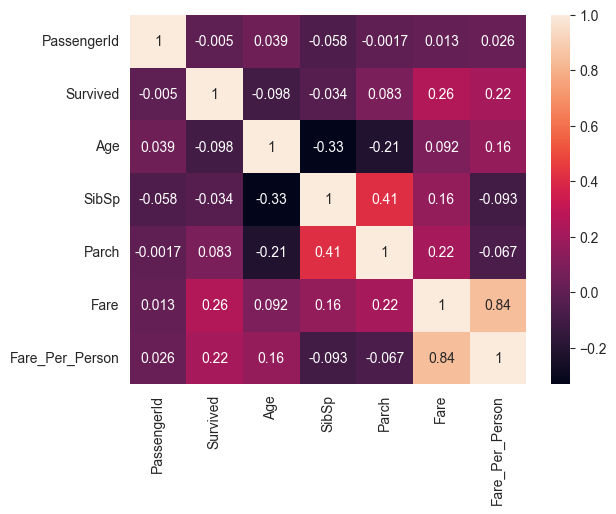

In [107]:
categorical_columns = full_df.select_dtypes(include=['object', 'category']).columns
corr_matrix = full_df.drop(columns=categorical_columns).corr()
sns.heatmap(corr_matrix, annot=True)

#### Machine learning part

In [108]:
full_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Fare_Bin', 'Fare_Per_Person'],
      dtype='object')

In [109]:
X = full_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
Y = full_df['Survived']

In [110]:
X.isnull().sum()

Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Fare_Bin           0
Fare_Per_Person    0
dtype: int64

In [111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Pclass           889 non-null    object  
 1   Sex              889 non-null    object  
 2   Age              889 non-null    float64 
 3   SibSp            889 non-null    int64   
 4   Parch            889 non-null    int64   
 5   Fare             889 non-null    float64 
 6   Embarked         889 non-null    object  
 7   Fare_Bin         889 non-null    category
 8   Fare_Per_Person  889 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 63.6+ KB


In [138]:
categorical_columns = X.select_dtypes(include=['object']).columns.to_list()
numerical_columns = X.select_dtypes(include='number').columns.to_list()
label_columns = ['Fare_Bin']

In [139]:
categorical_columns, numerical_columns, label_columns

(['Pclass', 'Sex', 'Embarked'],
 ['Age', 'SibSp', 'Parch', 'Fare', 'Fare_Per_Person'],
 ['Fare_Bin'])

In [140]:
preprocessor = ColumnTransformer(
    transformers=[
        ('object', cat_pipline, categorical_columns),  # Apply numeric transformation to 'numeric_col'
        ('num', num_pipline, numerical_columns), # Apply categorical transformation to 'categorical_col'
        ('cate', label_pipline, label_columns)  
    ])

transformed_data = preprocessor.fit_transform(X)

In [176]:
def evaluate_class_model(X, y, models, cv=5, scoring='accuracy'):
    """
    Evaluate different machine learning models using cross-validation and visualize the results.

    Parameters:
        X (DataFrame or array-like): Features.
        y (Series or array-like): Target variable.
        models (dict): Dictionary containing model names as keys and scikit-learn model objects as values.
        cv (int): Number of folds for cross-validation (default is 5).
        scoring (str): Evaluation metric for cross-validation (default is 'accuracy').

    Returns:
        results (dict): Dictionary containing model names as keys and mean evaluation scores as values.
    """
    results = {}
    names = []
    scores_mean = []
    scores_std = []

    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        results[name] = scores.mean()
        print(f"{name}: {scores.mean()} (±{scores.std()})")
        
        # Store results for visualization
        names.append(name)
        scores_mean.append(scores.mean())
        scores_std.append(scores.std())

    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.barh(np.arange(len(names)), scores_mean, xerr=scores_std, align='center', alpha=0.5)
    plt.yticks(np.arange(len(names)), names)
    plt.xlabel('Mean Score')
    plt.title('Model Evaluation')
    plt.show()

    return results

In [155]:
from sklearn.metrics import roc_curve, auc
def evaluate_precision_recall_roc_cv(X, y_true, models, cv=5):
    """
    Evaluate precision, recall, and plot ROC curve of multiple classification models using cross-validation.
    """
    results = {}
    for name, model in models.items():
        y_scores = cross_val_predict(model, X, y_true, cv=cv, method="predict_proba")[:, 1]
        precision = precision_score(y_true, (y_scores > 0.5))
        recall = recall_score(y_true, (y_scores > 0.5))

        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

        results[name] = (precision, recall)
        print(f"{name}: Precision={precision}, Recall={recall}")
    return results

Logistic Regression: 0.8009395035866185 (±0.02345117712244)
Random Forest: 0.8245604011934236 (±0.03436297364881263)
DecisionTree: 0.8076874246175331 (±0.03434403771885531)
Ada Boost: 0.823411413698978 (±0.0278001954810039)
Gradient Boosting: 0.844791468291754 (±0.023600646474570997)
SVM: 0.8133180981400369 (±0.022570291348072574)


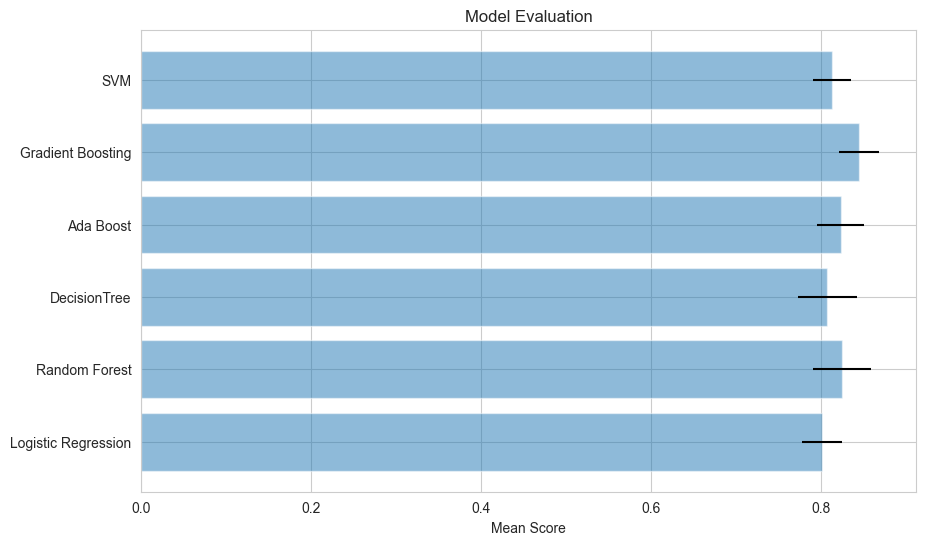

{'Logistic Regression': 0.8009395035866185,
 'Random Forest': 0.8245604011934236,
 'DecisionTree': 0.8076874246175331,
 'Ada Boost': 0.823411413698978,
 'Gradient Boosting': 0.844791468291754,
 'SVM': 0.8133180981400369}

In [177]:
models_to_evaluate = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'DecisionTree' : DecisionTreeClassifier(random_state=42),
    "Ada Boost": AdaBoostClassifier(n_estimators=200),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200),
    "SVM":SVC(kernel="rbf")
}
evaluate_class_model(transformed_data, Y, models_to_evaluate)

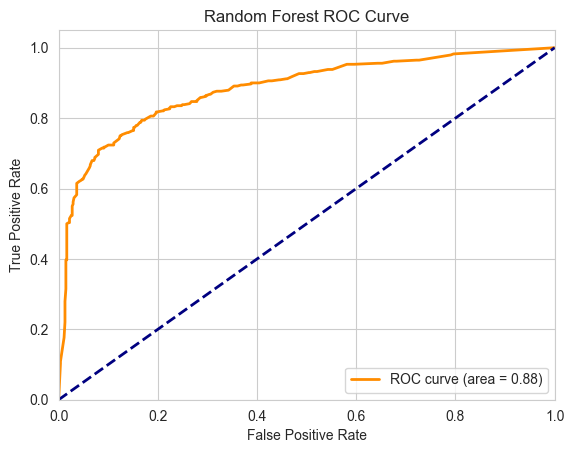

Random Forest: Precision=0.7852760736196319, Recall=0.7529411764705882


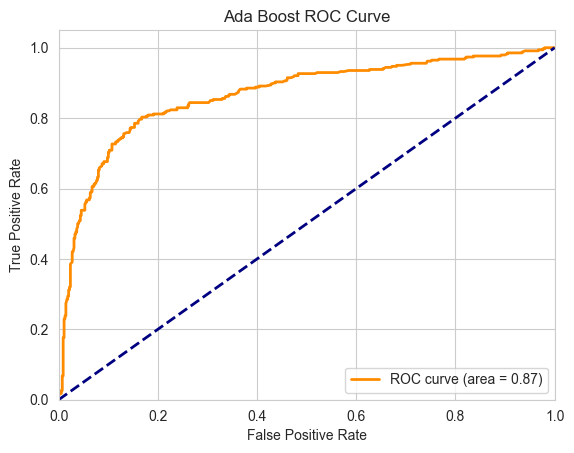

Ada Boost: Precision=0.7787878787878788, Recall=0.7558823529411764


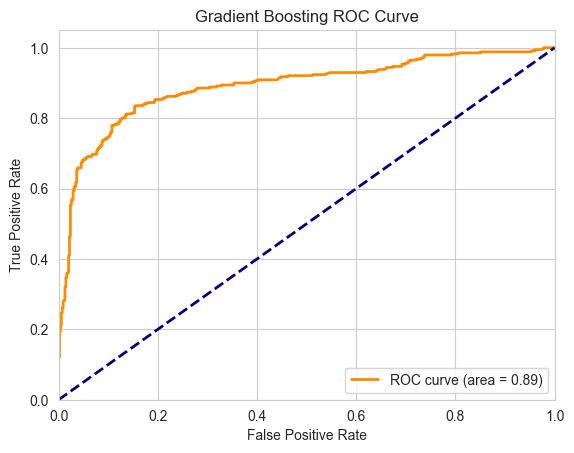

Gradient Boosting: Precision=0.8366666666666667, Recall=0.7382352941176471


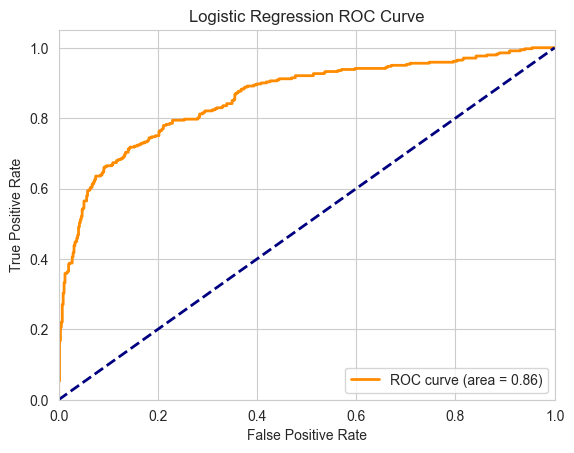

Logistic Regression: Precision=0.7587301587301587, Recall=0.7029411764705882


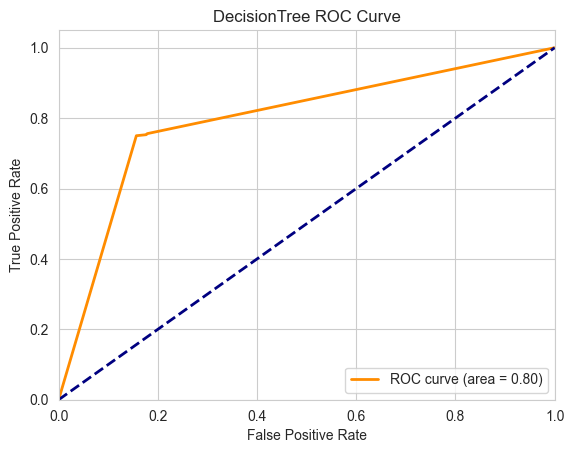

DecisionTree: Precision=0.7478005865102639, Recall=0.75
Evaluation results:
{'Random Forest': (0.7852760736196319, 0.7529411764705882), 'Ada Boost': (0.7787878787878788, 0.7558823529411764), 'Gradient Boosting': (0.8366666666666667, 0.7382352941176471), 'Logistic Regression': (0.7587301587301587, 0.7029411764705882), 'DecisionTree': (0.7478005865102639, 0.75)}


In [164]:
# Train multiple models
models = {
    'Random Forest': RandomForestClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'DecisionTree' : DecisionTreeClassifier(random_state=42),
}
results = evaluate_precision_recall_roc_cv(transformed_data, Y,models)
print("Evaluation results:")
print(results)

In [190]:
def measure_overfitting(X, y, models, test_size=0.2):
    overfitting_scores = {}
    for name, model in models.items():
        model.fit(X, y)
        train_pred = model.predict(X)
        train_acc = accuracy_score(y, train_pred)
        val_pred = cross_val_predict(model, X, y, cv=5)
        val_acc = accuracy_score(y, val_pred)
        overfitting_score = train_acc - val_acc
        overfitting_scores[name] = overfitting_score
        # print(f"{name}: Train Accuracy = {train_acc}, Validation Accuracy = {val_acc}, Overfitting Score = {overfitting_score}")
    return overfitting_scores

In [191]:
overfitting_scores = measure_overfitting(transformed_data, Y,models)
print("Overfitting scores:")
print(overfitting_scores)

Overfitting scores:
{'Random Forest': 0.16535433070866146, 'Ada Boost': 0.028121484814398134, 'Gradient Boosting': 0.05849268841394828, 'Logistic Regression': 0.01462317210348707, 'DecisionTree': 0.18110236220472442}
